In [ ]:
from tensorflow import keras
from keras_preprocessing import image
import numpy as np
import tensorflow as tf
from keras_preprocessing.image import ImageDataGenerator

In [ ]:
import keras
from keras.models import *
from keras.layers import *
from keras.optimizers import * 

In [ ]:
pip install visualkeras # Since colab doesn't have this visualization tool we have to install it. If your device already has this module ignore it

In [ ]:
import visualkeras



In [ ]:
#Importing images

width=150
height=150
train_datagen = ImageDataGenerator(
    rescale=1./255)

test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    "/content/drive/MyDrive/Bee_data/train", target_size=(width,height), batch_size=20, class_mode='categorical')


validation_generator = test_datagen.flow_from_directory(
    "/content/drive/MyDrive/Bee_data/val", target_size=(width,height), batch_size=20,class_mode='categorical')
	

Found 6700 images belonging to 10 classes.
Found 1678 images belonging to 10 classes.


In [ ]:
#Model 1

model=Sequential()
model.add(Conv2D(32,kernel_size=3,activation='relu',input_shape=(150,150,3)))
model.add(MaxPool2D(strides=(2,2)))

model.add(Flatten())
model.add(Dense(512,activation='relu'))
model.add(Dense(128,activation='relu'))
model.add(Dense(10,activation='softmax'))

In [ ]:
pip install visualkeras

     |████████████████████████████████| 798kB 14.3MB/s 


In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 32)        0         
_________________________________________________________________
flatten (Flatten)            (None, 175232)            0         
_________________________________________________________________
dense (Dense)                (None, 512)               89719296  
_________________________________________________________________
dense_1 (Dense)              (None, 128)               65664     
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1290      
Total params: 89,787,146
Trainable params: 89,787,146
Non-trainable params: 0
____________________________________________

In [ ]:

visualkeras.layered_view(model).show() # display using your system viewer


visualkeras.layered_view(model)

In [ ]:
rms=keras.optimizers.RMSprop(learning_rate=0.05,rho=0.9)
model.compile(loss="categorical_crossentropy",optimizer='adam',metrics=['categorical_accuracy'])

In [ ]:
from keras.callbacks import History
history=History()
model.fit_generator(train_generator,
                    steps_per_epoch=100,
                    epochs=10,
                    callbacks=[history],
                    validation_data=validation_generator,
                    validation_steps=40)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/10
100/100 [==============================] - 9s 84ms/step - loss: 5.5862 - categorical_accuracy: 0.1245 - val_loss: 2.2320 - val_categorical_accuracy: 0.1912
Epoch 2/10
100/100 [==============================] - 8s 82ms/step - loss: 2.1746 - categorical_accuracy: 0.1993 - val_loss: 1.8771 - val_categorical_accuracy: 0.2600
Epoch 3/10
100/100 [==============================] - 8s 83ms/step - loss: 1.7188 - categorical_accuracy: 0.3244 - val_loss: 1.4688 - val_categorical_accuracy: 0.4087
Epoch 4/10
100/100 [==============================] - 8s 83ms/step - loss: 1.3642 - categorical_accuracy: 0.4702 - val_loss: 1.1248 - val_categorical_accuracy: 0.6288
Epoch 5/10
100/100 [==============================] - 8s 81ms/step - loss: 1.0435 - categorical_accuracy: 0.6151 - val_loss: 0.9261 - val_categorical_accuracy: 0.6850
Epoch 6/10
100/100 [==============================] - 8s 82ms/step - loss: 0.8631 - categorical_accuracy: 0.6713 - val_loss: 0.7089 - val_categorical_accuracy: 0.776

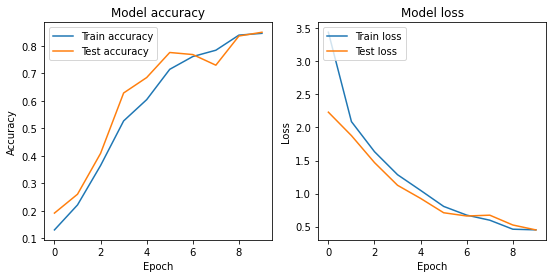

In [ ]:
# Plot training & validation accuracy values
plt.figure(figsize=(9,4))

plt.subplot(1,2,1)
plt.plot(history.history['categorical_accuracy'])
plt.plot(history.history['val_categorical_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train accuracy', 'Test accuracy'], loc='upper left')

# Plot training & validation loss values
plt.subplot(1,2,2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train loss', 'Test loss'], loc='upper left')
plt.show()

In [ ]:
model2=Sequential()
model2.add(Conv2D(32,kernel_size=3,activation='relu',input_shape=(150,150,3)))
model2.add(BatchNormalization())
model2.add(MaxPool2D(strides=(2,2)))
model2.add(Dropout(0.3))
model2.add(Flatten())
model2.add(Dense(512,activation='relu'))
model2.add(Dense(128,activation='relu'))
model2.add(Dense(10,activation='softmax'))
model2.summary()


Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
batch_normalization (BatchNo (None, 148, 148, 32)      128       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 74, 74, 32)        0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 175232)            0         
_________________________________________________________________
dense_6 (Dense)              (None, 512)               89719296  
_________________________________________________________________
dense_7 (Dense)              (None, 128)              

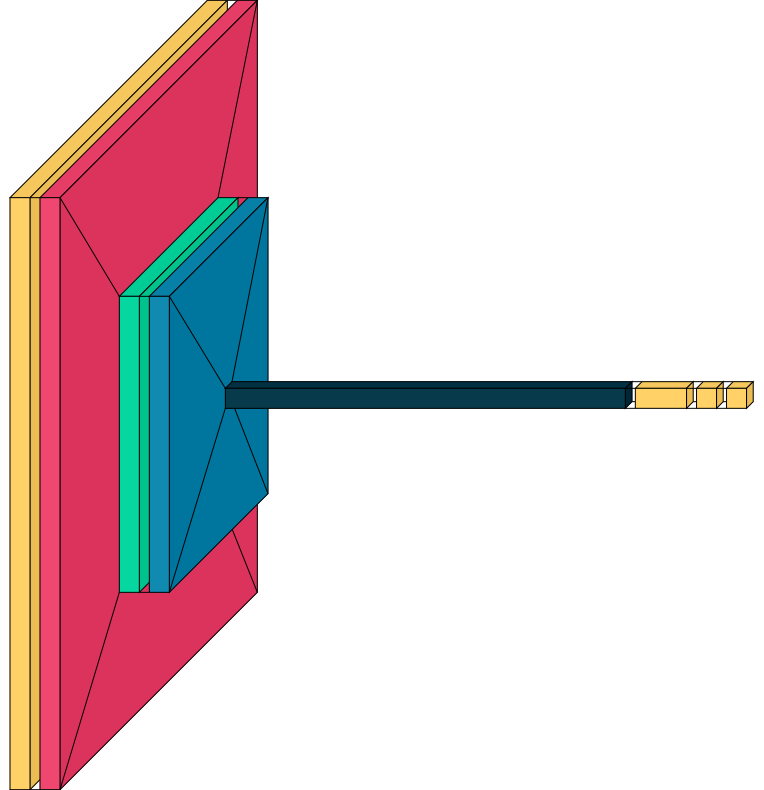

In [ ]:

visualkeras.layered_view(model2).show() # display using your system viewer


visualkeras.layered_view(model2)

In [ ]:
model2.compile(loss="categorical_crossentropy",optimizer='adam',metrics=['categorical_accuracy'])

In [ ]:
from keras.callbacks import History
history2=History()
model2.fit_generator(train_generator,
                    steps_per_epoch=100,
                    epochs=10,
                    callbacks=[history2],
                    validation_data=validation_generator,
                    validation_steps=40)

Epoch 1/10
  1/100 [..............................] - ETA: 10s - loss: 0.1623 - categorical_accuracy: 0.9500

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


100/100 [==============================] - 9s 86ms/step - loss: 0.2176 - categorical_accuracy: 0.9265 - val_loss: 0.2539 - val_categorical_accuracy: 0.9337
Epoch 2/10
100/100 [==============================] - 9s 87ms/step - loss: 0.1864 - categorical_accuracy: 0.9400 - val_loss: 0.1799 - val_categorical_accuracy: 0.9475
Epoch 3/10
100/100 [==============================] - 9s 89ms/step - loss: 0.1865 - categorical_accuracy: 0.9405 - val_loss: 0.2867 - val_categorical_accuracy: 0.9100
Epoch 4/10
100/100 [==============================] - 9s 86ms/step - loss: 0.1453 - categorical_accuracy: 0.9470 - val_loss: 0.2137 - val_categorical_accuracy: 0.9388
Epoch 5/10
100/100 [==============================] - 9s 85ms/step - loss: 0.1340 - categorical_accuracy: 0.9560 - val_loss: 0.2928 - val_categorical_accuracy: 0.9125
Epoch 6/10
100/100 [==============================] - 8s 85ms/step - loss: 0.1319 - categorical_accuracy: 0.9610 - val_loss: 0.5937 - val_categorical_accuracy: 0.8125
Epoch 7/1

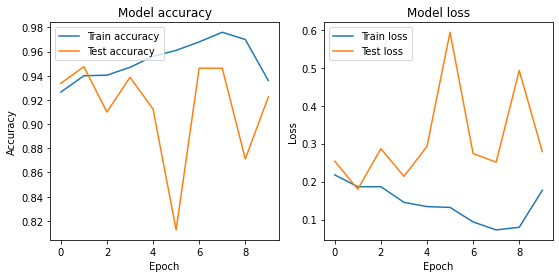

In [ ]:
# Plot training & validation accuracy values
import matplotlib.pyplot as plt

plt.figure(figsize=(9,4))

plt.subplot(1,2,1)
plt.plot(history2.history['categorical_accuracy'])
plt.plot(history2.history['val_categorical_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train accuracy', 'Test accuracy'], loc='upper left')

# Plot training & validation loss values
plt.subplot(1,2,2)
plt.plot(history2.history['loss'])
plt.plot(history2.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train loss', 'Test loss'], loc='upper left')
plt.show()

In [ ]:
model3=Sequential()
model3.add(Conv2D(32,kernel_size=3,activation='relu',input_shape=(150,150,3)))
model3.add(Conv2D(32,kernel_size=3,activation='relu'))
model3.add(BatchNormalization())
model3.add(MaxPool2D(strides=(2,2)))
model3.add(Dropout(0.3))
model3.add(Conv2D(64,kernel_size=5,activation='relu'))
model3.add(Conv2D(64,kernel_size=5,activation='relu'))
model3.add(BatchNormalization())
model3.add(MaxPool2D(strides=(2,2)))
model3.add(Dropout(0.3))
model3.add(Flatten())
model3.add(Dense(512,activation='relu'))
model3.add(Dense(128,activation='relu'))
model3.add(Dense(10,activation='softmax'))




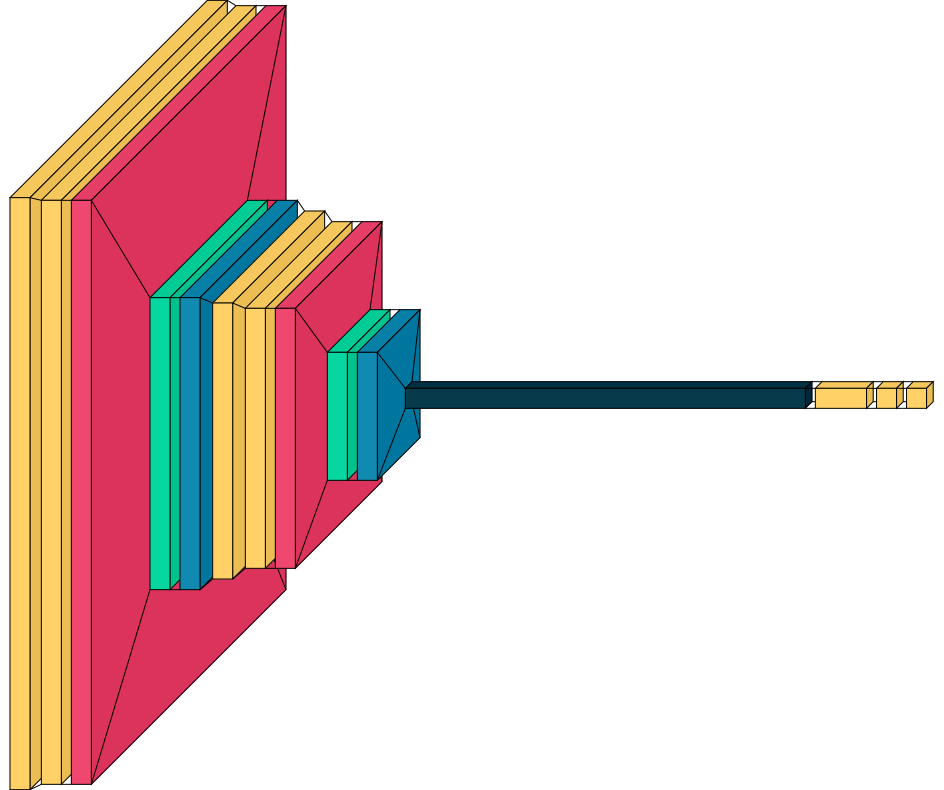

In [ ]:

visualkeras.layered_view(model3).show() # display using your system viewer


visualkeras.layered_view(model3)

In [ ]:
model3.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 146, 146, 32)      9248      
_________________________________________________________________
batch_normalization_4 (Batch (None, 146, 146, 32)      128       
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 73, 73, 32)        0         
_________________________________________________________________
dropout_4 (Dropout)          (None, 73, 73, 32)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 69, 69, 64)        51264     
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 65, 65, 64)       

In [ ]:
model3.compile(loss="categorical_crossentropy",optimizer='adam',metrics=['categorical_accuracy'])


In [ ]:
history3=model.fit_generator(train_generator,
                    steps_per_epoch=100,
                    epochs=10,
                    
                    validation_data=validation_generator,
                    validation_steps=40)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/10
100/100 [==============================] - 264s 3s/step - loss: 1.3590 - categorical_accuracy: 0.5105 - val_loss: 1.1901 - val_categorical_accuracy: 0.5987
Epoch 2/10
100/100 [==============================] - 194s 2s/step - loss: 0.9822 - categorical_accuracy: 0.6555 - val_loss: 0.8597 - val_categorical_accuracy: 0.6850
Epoch 3/10
100/100 [==============================] - 132s 1s/step - loss: 0.6998 - categorical_accuracy: 0.7675 - val_loss: 0.8392 - val_categorical_accuracy: 0.6612
Epoch 4/10
100/100 [==============================] - 87s 873ms/step - loss: 0.5310 - categorical_accuracy: 0.8285 - val_loss: 0.5966 - val_categorical_accuracy: 0.7912
Epoch 5/10
100/100 [==============================] - 62s 622ms/step - loss: 0.4097 - categorical_accuracy: 0.8710 - val_loss: 0.4798 - val_categorical_accuracy: 0.8413
Epoch 6/10
100/100 [==============================] - 48s 481ms/step - loss: 0.3245 - categorical_accuracy: 0.9035 - val_loss: 0.2828 - val_categorical_accuracy:

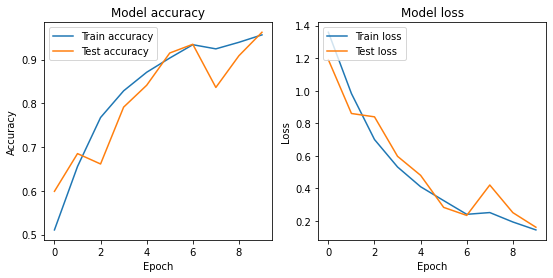

In [ ]:
# Plot training & validation accuracy values
import matplotlib.pyplot as plt

plt.figure(figsize=(9,4))

plt.subplot(1,2,1)
plt.plot(history3.history['categorical_accuracy'])
plt.plot(history3.history['val_categorical_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train accuracy', 'Test accuracy'], loc='upper left')

# Plot training & validation loss values
plt.subplot(1,2,2)
plt.plot(history3.history['loss'])
plt.plot(history3.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train loss', 'Test loss'], loc='upper left')
plt.show()